<a href="https://colab.research.google.com/github/DBCooper200/project_dl/blob/main/5ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck										

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.
Download
If you're going to use this dataset, please cite the tech report at the bottom of this page.
Version	Size	md5sum
CIFAR-10 python version	163 MB	c58f30108f718f92721af3b95e74349a
CIFAR-10 Matlab version	175 MB	70270af85842c9e89bb428ec9976c926
CIFAR-10 binary version (suitable for C programs)	162 MB	c32a1d4ab5d03f1284b67883e8d87530
Baseline results
You can find some baseline replicable results on this dataset on the project page for cuda-convnet. These results were obtained with a convolutional neural network. Briefly, they are 18% test error without data augmentation and 11% with. Additionally, Jasper Snoek has a new paper in which he used Bayesian hyperparameter optimization to find nice settings of the weight decay and other hyperparameters, which allowed him to obtain a test error rate of 15% (without data augmentation) using the architecture of the net that got 18%.
Other results
Rodrigo Benenson has been kind enough to collect results on CIFAR-10/100 and other datasets on his website; click here to view.
Dataset layout
Python / Matlab versions
I will describe the layout of the Python version of the dataset. The layout of the Matlab version is identical.

The archive contains the files data_batch_1, data_batch_2, ..., data_batch_5, as well as test_batch. Each of these files is a Python "pickled" object produced with cPickle. Here is a python2 routine which will open such a file and return a dictionary:
def unpickle(file):
    import cPickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict
And a python3 version:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
Loaded in this way, each of the batch files contains a dictionary with the following elements:
data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:
label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.
Binary version
The binary version contains the files data_batch_1.bin, data_batch_2.bin, ..., data_batch_5.bin, as well as test_batch.bin. Each of these files is formatted as follows:
<1 x label><3072 x pixel>
...
<1 x label><3072 x pixel>
In other words, the first byte is the label of the first image, which is a number in the range 0-9. The next 3072 bytes are the values of the pixels of the image. The first 1024 bytes are the red channel values, the next 1024 the green, and the final 1024 the blue. The values are stored in row-major order, so the first 32 bytes are the red channel values of the first row of the image.

Each file contains 10000 such 3073-byte "rows" of images, although there is nothing delimiting the rows. Therefore each file should be exactly 30730000 bytes long.

There is another file, called batches.meta.txt. This is an ASCII file that maps numeric labels in the range 0-9 to meaningful class names. It is merely a list of the 10 class names, one per row. The class name on row i corresponds to numeric label i.
The CIFAR-100 dataset
This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100:

Superclass	Classes
aquatic mammals	beaver, dolphin, otter, seal, whale
fish	aquarium fish, flatfish, ray, shark, trout
flowers	orchids, poppies, roses, sunflowers, tulips
food containers	bottles, bowls, cans, cups, plates
fruit and vegetables	apples, mushrooms, oranges, pears, sweet peppers
household electrical devices	clock, computer keyboard, lamp, telephone, television
household furniture	bed, chair, couch, table, wardrobe
insects	bee, beetle, butterfly, caterpillar, cockroach
large carnivores	bear, leopard, lion, tiger, wolf
large man-made outdoor things	bridge, castle, house, road, skyscraper
large natural outdoor scenes	cloud, forest, mountain, plain, sea
large omnivores and herbivores	camel, cattle, chimpanzee, elephant, kangaroo
medium-sized mammals	fox, porcupine, possum, raccoon, skunk
non-insect invertebrates	crab, lobster, snail, spider, worm
people	baby, boy, girl, man, woman
reptiles	crocodile, dinosaur, lizard, snake, turtle
small mammals	hamster, mouse, rabbit, shrew, squirrel
trees	maple, oak, palm, pine, willow
vehicles 1	bicycle, bus, motorcycle, pickup truck, train
vehicles 2	lawn-mower, rocket, streetcar, tank, tractor

Yes, I know mushrooms aren't really fruit or vegetables and bears aren't really carnivores.
Download
Version	Size	md5sum
CIFAR-100 python version	161 MB	eb9058c3a382ffc7106e4002c42a8d85
CIFAR-100 Matlab version	175 MB	6a4bfa1dcd5c9453dda6bb54194911f4
CIFAR-100 binary version (suitable for C programs)	161 MB	03b5dce01913d631647c71ecec9e9cb8
Dataset layout
Python / Matlab versions
The python and Matlab versions are identical in layout to the CIFAR-10, so I won't waste space describing them here.
Binary version
The binary version of the CIFAR-100 is just like the binary version of the CIFAR-10, except that each image has two label bytes (coarse and fine) and 3072 pixel bytes, so the binary files look like this:
<1 x coarse label><1 x fine label><3072 x pixel>
...
<1 x coarse label><1 x fine label><3072 x pixel>
Indices into the original 80 million tiny images dataset
Sivan Sabato was kind enough to provide this file, which maps CIFAR-100 images to images in the 80 million tiny images dataset. Sivan Writes:
The file has 60000 rows, each row contains a single index into the tiny db,
where the first image in the tiny db is indexed "1". "0" stands for an image that is not from the tiny db.
The first 50000 lines correspond to the training set, and the last 10000 lines correspond
to the test set.

In [3]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [4]:
X_train.shape    #3-rgb channels of image

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

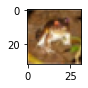

In [6]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])
plot_sample(0)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[y_train[3][0]]

'deer'

In [9]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
#255 because the range of values of all the pixels i.e. rgb values are 0-255

In [10]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
#one hot encoding i.e. 10 features are created and if y=6 then 6th new feature has one all the others r 0

In [12]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [14]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',#because of one hot encoding
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 158s 101ms/step - loss: 1.8129 - accuracy: 0.3536
Epoch 2/2
1563/1563 [==============================] - 148s 95ms/step - loss: 1.6250 - accuracy: 0.4264


In [15]:
model.predict(X_test_scaled)

313/313 [==============================] - 11s 34ms/step


array([[0.35384235, 0.49960753, 0.70963204, ..., 0.1607965 , 0.5046864 ,
        0.11155824],
       [0.84196216, 0.811322  , 0.35696462, ..., 0.15253003, 0.92430866,
        0.9660271 ],
       [0.9119605 , 0.787034  , 0.4195868 , ..., 0.24310873, 0.95393485,
        0.8764436 ],
       ...,
       [0.1419806 , 0.11594832, 0.70484954, ..., 0.6310729 , 0.27247298,
        0.1862891 ],
       [0.33407584, 0.21297072, 0.7252103 , ..., 0.5203595 , 0.18230902,
        0.22395933],
       [0.4898644 , 0.12718555, 0.6764025 , ..., 0.9138311 , 0.1810166 ,
        0.29027882]], dtype=float32)

In [16]:
model.predict(X_test_scaled)[0]

313/313 [==============================] - 10s 32ms/step


array([0.35384235, 0.49960753, 0.70963204, 0.8960905 , 0.3911842 ,
       0.860072  , 0.80907226, 0.1607965 , 0.5046864 , 0.11155824],
      dtype=float32)

In [17]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 10s 32ms/step


3

In [21]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 10s 32ms/step - loss: 1.5981 - accuracy: 0.4394


[1.598070740699768, 0.43939998745918274]